In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dissertation/data/merged.csv", index_col=0)

In [ ]:
df.head()

,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
match_id,,,,,,,,,,,,,,,,,,,,,
1001349,2016/17,2/17/2017,Melbourne Cricket Ground,1,0.1,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001349,2016/17,2/17/2017,Melbourne Cricket Ground,1,0.2,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001349,2016/17,2/17/2017,Melbourne Cricket Ground,1,0.3,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001349,2016/17,2/17/2017,Melbourne Cricket Ground,1,0.4,Australia,Sri Lanka,M Klinger,AJ Finch,SL Malinga,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001349,2016/17,2/17/2017,Melbourne Cricket Ground,1,0.5,Australia,Sri Lanka,M Klinger,AJ Finch,SL Malinga,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [ ]:
import numpy as np

def separate_ball_numbers(df):

    completed_over = []
    ball_no = []
    for ball in df["ball"]:
        try:
            ball_num = float(ball) * 10
            if 10 >= ball_num <= 100:
                completed_over.append(int(ball_num // 100))
                ball_no.append(int(ball_num % 100))
            else:
                completed_over.append(int(ball_num // 10))
                ball_no.append(int(ball_num % 10))
        except (ValueError, TypeError):
            completed_over.append(np.nan)
            ball_no.append(np.nan)
    df["completed_over"] = completed_over
    df["ball_no"] = ball_no
    return df

df = separate_ball_numbers(df)

In [ ]:
df.tail(10)

,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,completed_over,ball_no
match_id,,,,,,,,,,,,,,,,,,,,,
995469,2016,9/9/2016,R Premadasa Stadium,2,16.3,Australia,Sri Lanka,TM Head,MS Wade,TM Dilshan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,3.0
995469,2016,9/9/2016,R Premadasa Stadium,2,16.4,Australia,Sri Lanka,TM Head,MS Wade,TM Dilshan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.0
995469,2016,9/9/2016,R Premadasa Stadium,2,16.5,Australia,Sri Lanka,MS Wade,TM Head,TM Dilshan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0
995469,2016,9/9/2016,R Premadasa Stadium,2,16.6,Australia,Sri Lanka,MS Wade,TM Head,TM Dilshan,...,NaN,NaN,NaN,NaN,caught,MS Wade,NaN,NaN,16.0,6.0
995469,2016,9/9/2016,R Premadasa Stadium,2,17.1,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1.0
995469,2016,9/9/2016,R Premadasa Stadium,2,17.2,Australia,Sri Lanka,PM Nevill,TM Head,SS Pathirana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,2.0
995469,2016,9/9/2016,R Premadasa Stadium,2,17.3,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,3.0
995469,2016,9/9/2016,R Premadasa Stadium,2,17.4,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,4.0
995469,2016,9/9/2016,R Premadasa Stadium,2,17.5,Australia,Sri Lanka,TM Head,PM Nevill,SS Pathirana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,5.0


In [ ]:
new_order = ['start_date', 'venue', 'innings', 'batting_team', 'bowling_team',
      'completed_over', 'ball_no', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
      'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
      'wicket_type', 'player_dismissed', 'other_wicket_type',
      'other_player_dismissed']

In [ ]:
df = df[new_order]
df.tail(10)

,start_date,venue,innings,batting_team,bowling_team,completed_over,ball_no,striker,non_striker,bowler,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
match_id,,,,,,,,,,,,,,,,,,,,,
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,16.0,3.0,TM Head,MS Wade,TM Dilshan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,16.0,4.0,TM Head,MS Wade,TM Dilshan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,16.0,5.0,MS Wade,TM Head,TM Dilshan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,16.0,6.0,MS Wade,TM Head,TM Dilshan,...,0,NaN,NaN,NaN,NaN,NaN,caught,MS Wade,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,1.0,TM Head,PM Nevill,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,2.0,PM Nevill,TM Head,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,3.0,TM Head,PM Nevill,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,4.0,TM Head,PM Nevill,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,5.0,TM Head,PM Nevill,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check if the last row is empty

last_row = df.iloc[-1, :]
if pd.isnull(last_row).all():
    df = df.iloc[:-1, :]

In [ ]:
df.tail(5)

,start_date,venue,innings,batting_team,bowling_team,completed_over,ball_no,striker,non_striker,bowler,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
match_id,,,,,,,,,,,,,,,,,,,,,
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,1.0,TM Head,PM Nevill,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,2.0,PM Nevill,TM Head,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,3.0,TM Head,PM Nevill,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,4.0,TM Head,PM Nevill,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,17.0,5.0,TM Head,PM Nevill,SS Pathirana,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['extras'].unique()

array(['0', '1', '5', '4', '2', 'extras', '3', '6'], dtype=object)

In [ ]:
df['wides'].unique()

array([nan, '1', '5', '2', 'wides', '3', '4'], dtype=object)

In [ ]:
df['noballs'].unique()

array([nan, '1', 'noballs', '2', '5', '3'], dtype=object)

In [ ]:
df['byes'].unique()

array([nan, '1', 'byes', '4', '2', '3', '5'], dtype=object)

In [ ]:
df['legbyes'].unique()

array([nan, '1', '4', 'legbyes', '2', '3', '5'], dtype=object)

In [ ]:
df['penalty'].unique()

array([nan, 'penalty', '5'], dtype=object)

In [ ]:
df['venue'].value_counts()

Dubai International Cricket Stadium                        19926
Al Amerat Cricket Ground Oman Cricket (Ministry Turf 1)    14884
Gahanga International Cricket Stadium. Rwanda              10495
Sheikh Zayed Stadium                                       10362
Harare Sports Club                                          9148
                                                           ...  
University Oval, Dunedin                                     214
Narendra Modi Stadium, Ahmedabad                             199
McLean Park, Napier                                          179
Vidarbha Cricket Association Stadium, Jamtha, Nagpur          97
M Chinnaswamy Stadium, Bangalore                              22
Name: venue, Length: 249, dtype: int64

In [ ]:
# df.to_excel('data.xlsx')

In [ ]:
df.columns

Index(['start_date', 'venue', 'innings', 'batting_team', 'bowling_team',
       'completed_over', 'ball_no', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [ ]:
df.dtypes

start_date                 object
venue                      object
innings                    object
batting_team               object
bowling_team               object
completed_over            float64
ball_no                   float64
striker                    object
non_striker                object
bowler                     object
runs_off_bat               object
extras                     object
wides                      object
noballs                    object
byes                       object
legbyes                    object
penalty                    object
wicket_type                object
player_dismissed           object
other_wicket_type          object
other_player_dismissed     object
dtype: object

In [ ]:
new_vars = ['start_date', 'venue', 'innings', 'batting_team', 'bowling_team','striker', 'completed_over', 'ball_no', 'runs_off_bat', 'wicket_type']
df1 = df[new_vars]

In [ ]:
df1.head(10)

,start_date,venue,innings,batting_team,bowling_team,striker,completed_over,ball_no,runs_off_bat,wicket_type
match_id,,,,,,,,,,
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,0.0,1.0,0,NaN
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,0.0,2.0,0,NaN
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,0.0,3.0,1,NaN
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,0.0,4.0,2,NaN
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,0.0,5.0,0,NaN
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,0.0,6.0,3,NaN
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,1.0,1.0,0,NaN
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,1.0,2.0,1,NaN
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,1.0,3.0,0,NaN


In [ ]:
# Repalce NaN with zero on all columns
df1['wicket_type'].fillna(0)
print(df1)

         start_date                     venue innings batting_team  \
match_id                                                             
1001349   2/17/2017  Melbourne Cricket Ground       1    Australia   
1001349   2/17/2017  Melbourne Cricket Ground       1    Australia   
1001349   2/17/2017  Melbourne Cricket Ground       1    Australia   
1001349   2/17/2017  Melbourne Cricket Ground       1    Australia   
1001349   2/17/2017  Melbourne Cricket Ground       1    Australia   
...             ...                       ...     ...          ...   
995469     9/9/2016       R Premadasa Stadium       2    Australia   
995469     9/9/2016       R Premadasa Stadium       2    Australia   
995469     9/9/2016       R Premadasa Stadium       2    Australia   
995469     9/9/2016       R Premadasa Stadium       2    Australia   
995469     9/9/2016       R Premadasa Stadium       2    Australia   

         bowling_team    striker  completed_over  ball_no runs_off_bat  \
match_id       

In [ ]:
df1['wicket_type'].fillna(0)

match_id
1001349    0
1001349    0
1001349    0
1001349    0
1001349    0
          ..
995469     0
995469     0
995469     0
995469     0
995469     0
Name: wicket_type, Length: 420547, dtype: object

In [ ]:
df1['wicket_type'].value_counts()

caught                   13142
bowled                    4826
run out                   1980
wicket_type               1833
lbw                       1796
stumped                    793
caught and bowled          668
retired hurt                28
hit wicket                  26
retired not out              4
retired out                  3
obstructing the field        2
Name: wicket_type, dtype: int64

In [ ]:
# Create new column
df1['fall_of_wicket'] = 0

# Set 'fall_of_wicket' to 1 where 'wicket_type' is not null
df1.loc[df1['wicket_type'].notna(), 'fall_of_wicket'] = 1

<ipython-input-25-a544c2528082>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fall_of_wicket'] = 0


In [ ]:
df1['fall_of_wicket'].unique()

array([0, 1])

In [ ]:
df1['ball_no'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan,  9.])

In [ ]:
df1[df1['ball_no'].isnull()]

,start_date,venue,innings,batting_team,bowling_team,striker,completed_over,ball_no,runs_off_bat,wicket_type,fall_of_wicket
match_id,,,,,,,,,,,
match_id,start_date,venue,innings,batting_team,bowling_team,striker,NaN,NaN,runs_off_bat,wicket_type,1
match_id,start_date,venue,innings,batting_team,bowling_team,striker,NaN,NaN,runs_off_bat,wicket_type,1
match_id,start_date,venue,innings,batting_team,bowling_team,striker,NaN,NaN,runs_off_bat,wicket_type,1
match_id,start_date,venue,innings,batting_team,bowling_team,striker,NaN,NaN,runs_off_bat,wicket_type,1
match_id,start_date,venue,innings,batting_team,bowling_team,striker,NaN,NaN,runs_off_bat,wicket_type,1
...,...,...,...,...,...,...,...,...,...,...,...
match_id,start_date,venue,innings,batting_team,bowling_team,striker,NaN,NaN,runs_off_bat,wicket_type,1
match_id,start_date,venue,innings,batting_team,bowling_team,striker,NaN,NaN,runs_off_bat,wicket_type,1
match_id,start_date,venue,innings,batting_team,bowling_team,striker,NaN,NaN,runs_off_bat,wicket_type,1


In [ ]:
df1 = df1.dropna(subset=['ball_no'])
df1.head(10)

,start_date,venue,innings,batting_team,bowling_team,striker,completed_over,ball_no,runs_off_bat,wicket_type,fall_of_wicket
match_id,,,,,,,,,,,
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,0.0,1.0,0,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,0.0,2.0,0,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,0.0,3.0,1,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,0.0,4.0,2,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,0.0,5.0,0,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,0.0,6.0,3,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,1.0,1.0,0,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,1.0,2.0,1,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,AJ Finch,1.0,3.0,0,NaN,0


In [ ]:
df1['ball_no'].unique()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
df1['completed_over'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [ ]:
df1['runs_off_bat'].unique()

array(['0', '1', '2', '3', '4', '6', '5', '7'], dtype=object)

In [ ]:
df1['wicket_type'].unique()

array([nan, 'caught', 'run out', 'stumped', 'lbw', 'caught and bowled',
       'bowled', 'retired hurt', 'obstructing the field', 'hit wicket',
       'retired out', 'retired not out'], dtype=object)

In [ ]:
check_few = [7, 8, 9]
rows_with_desired_values = df1[df1['ball_no'].isin(check_few)]
rows_with_desired_values

,start_date,venue,innings,batting_team,bowling_team,striker,completed_over,ball_no,runs_off_bat,wicket_type,fall_of_wicket
match_id,,,,,,,,,,,
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,M Klinger,5.0,7.0,0,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,TM Head,13.0,7.0,1,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,TM Head,15.0,7.0,6,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,TM Head,17.0,7.0,2,NaN,0
1001349,2/17/2017,Melbourne Cricket Ground,1,Australia,Sri Lanka,JP Faulkner,19.0,7.0,4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
995469,9/9/2016,R Premadasa Stadium,1,Sri Lanka,Australia,SMSM Senanayake,18.0,8.0,1,NaN,0
995469,9/9/2016,R Premadasa Stadium,1,Sri Lanka,Australia,SMSM Senanayake,19.0,7.0,1,NaN,0
995469,9/9/2016,R Premadasa Stadium,2,Australia,Sri Lanka,DA Warner,2.0,7.0,0,NaN,0


In [ ]:
df1['innings'].unique()

array(['1', '2', '3', '4'], dtype=object)

Wait... how does a T20 match have 4 innings in a match? It has to be the super overs in a match. These super overs will add unexpected noises in the dataset and will eventually result in erroneous data. Hence, let's just trim the third and fourth innings altogether.

In [ ]:
check_few = ['3', '4']
rows_with_extra_innings = df1[df1['innings'].isin(check_few)]
rows_with_extra_innings

,start_date,venue,innings,batting_team,bowling_team,striker,completed_over,ball_no,runs_off_bat,wicket_type,fall_of_wicket
match_id,,,,,,,,,,,
1144172,3/19/2019,Newlands,3,South Africa,Sri Lanka,DA Miller,0.0,1.0,1,NaN,0
1144172,3/19/2019,Newlands,3,South Africa,Sri Lanka,HE van der Dussen,0.0,2.0,1,NaN,0
1144172,3/19/2019,Newlands,3,South Africa,Sri Lanka,DA Miller,0.0,3.0,6,NaN,0
1144172,3/19/2019,Newlands,3,South Africa,Sri Lanka,DA Miller,0.0,4.0,0,NaN,0
1144172,3/19/2019,Newlands,3,South Africa,Sri Lanka,DA Miller,0.0,5.0,4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
902653,11/30/2015,Sharjah Cricket Stadium,4,England,Pakistan,EJG Morgan,0.0,1.0,0,NaN,0
902653,11/30/2015,Sharjah Cricket Stadium,4,England,Pakistan,EJG Morgan,0.0,2.0,1,NaN,0
902653,11/30/2015,Sharjah Cricket Stadium,4,England,Pakistan,JC Buttler,0.0,3.0,0,NaN,0


In [ ]:
df1 = df1.drop(rows_with_extra_innings.index)

In [ ]:
df1.iloc[:,0].value_counts

<bound method IndexOpsMixin.value_counts of match_id
1001349    2/17/2017
1001349    2/17/2017
1001349    2/17/2017
1001349    2/17/2017
1001349    2/17/2017
             ...    
995469      9/9/2016
995469      9/9/2016
995469      9/9/2016
995469      9/9/2016
995469      9/9/2016
Name: start_date, Length: 414419, dtype: object>

There it is, clean!

# Polynomial Regression

In [ ]:
X = df1.drop(["runs_off_bat", "start_date", "venue", "batting_team", "bowling_team", "striker", "wicket_type"], axis=1)
y = df1["runs_off_bat"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
# Predict the target variable on the test set.
y_pred = lin_reg.predict(X_test)

In [ ]:
# Evaluate the model performance.
print("R2 score:", lin_reg.score(X_test, y_test))

In [ ]:
import numpy as np
import sklearn.metrics as metrics

# Mean squared error (MSE)
MSE = np.mean((y_pred - y_test.astype('float64'))**2)
print("MSE:", MSE)

# Root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Mean absolute error (MAE)
MAE = np.mean(np.abs(y_pred - y_test.astype('float64')))
print("MAE:", MAE)

# R-squared
R_squared = metrics.r2_score(y_test.astype('float64'), y_pred)
print("R-squared:", R_squared)

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [ ]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [ ]:
import numpy as np
import sklearn.metrics as metrics

# Mean squared error (MSE)
MSE = np.mean((y_pred - y_test.astype('float64'))**2)
print("MSE:", MSE)

# Root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Mean absolute error (MAE)
MAE = np.mean(np.abs(y_pred - y_test.astype('float64')))
print("MAE:", MAE)

# R-squared
R_squared = metrics.r2_score(y_test.astype('float64'), y_pred)
print("R-squared:", R_squared)

MSE: 2.2845806523673553
RMSE: 1.5114829315501235
MAE: 1.0540376885317013
R-squared: 0.04097040556553677


As you can see, the polynomial regression model has a slightly lower MSE, RMSE, and MAE than the linear regression model. It also has a slightly higher R-squared value. This means that the polynomial regression model is slightly better at predicting the target variable than the linear regression model.

In [ ]:
print(lin_reg_2.intercept_)
print(lin_reg_2.coef_)

0.7041273850114225
[ 3.49038198e-16  2.18760219e-04  7.27439240e-02  1.14219141e-01
 -2.53734122e-01  6.56280656e-04  4.38985553e-02  6.96649890e-02
 -1.45219427e-01 -9.57515491e-03 -1.20136974e-02 -7.14718712e-04
 -2.55707883e-02 -2.72909728e-02 -2.53734122e-01  1.53132153e-03
 -1.37921821e-02 -1.94433143e-02  7.18099637e-02 -4.50629376e-04
 -9.51988234e-04  1.00646662e-02 -9.72067649e-04  2.26804747e-03
 -1.45219427e-01  3.75531579e-04  4.32364152e-04 -1.99202626e-03
  6.42096427e-04  5.02967914e-04 -7.14718712e-04  1.28207456e-03
  6.30913715e-03 -2.72909728e-02 -2.53734122e-01]


In [ ]:
coefficients = lin_reg_2.coef_

polynomial_equation = "y = " + str(coefficients[0])
for i in range(1, len(coefficients)):
    polynomial_equation += " + " + str(coefficients[i]) + "x" + str(i)

print(polynomial_equation)

y = 3.4903819758051073e-16 + 0.00021876021870840715x1 + 0.07274392400707608x2 + 0.11421914065502983x3 + -0.25373412167621884x4 + 0.0006562806561754867x5 + 0.04389855530853718x6 + 0.06966498900453715x7 + -0.14521942653767927x8 + -0.009575154910954557x9 + -0.012013697428976717x10 + -0.0007147187119951992x11 + -0.025570788304176188x12 + -0.02729097279056219x13 + -0.2537341216762183x14 + 0.0015313215310682833x15 + -0.013792182088537096x16 + -0.019443314296431428x17 + 0.07180996373940216x18 + -0.00045062937630921016x19 + -0.0009519882343508445x20 + 0.010064666230542557x21 + -0.0009720676486300728x22 + 0.0022680474651834677x23 + -0.14521942653767825x24 + 0.000375531579240071x25 + 0.0004323641516842283x26 + -0.0019920262570658994x27 + 0.0006420964268817339x28 + 0.0005029679139787487x29 + -0.0007147187119950425x30 + 0.0012820745552260262x31 + 0.006309137149345702x32 + -0.02729097279056328x33 + -0.25373412167621806x34


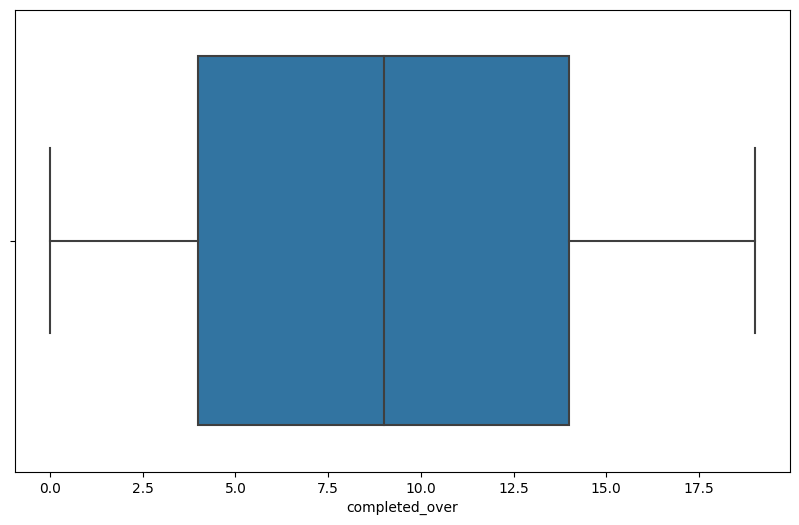

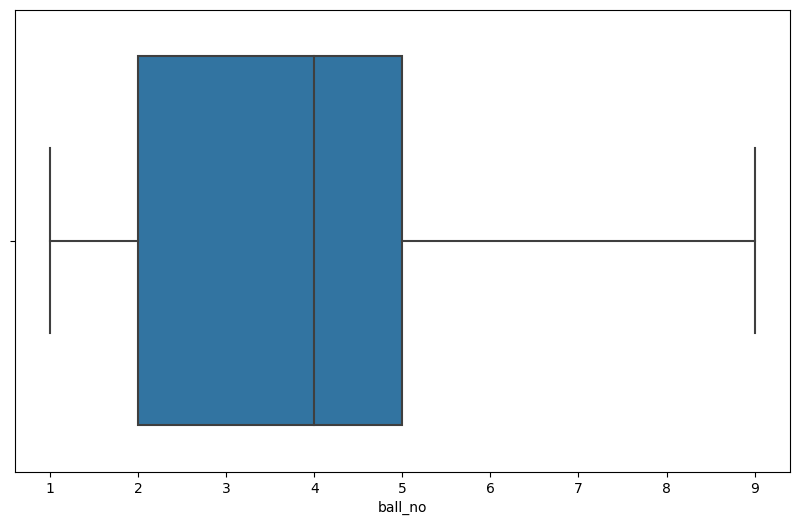

[0, 1, 2, 3, 4, 5, 125, 126, 127, 128, 129, 130, 250, 251, 252, 253, 254, 255, 373, 374, 375, 376, 377, 378, 497, 498, 499, 500, 501, 502, 622, 623, 624, 625, 626, 627, 628, 737, 738, 739, 740, 741, 742, 865, 866, 867, 868, 869, 870, 986, 987, 988, 989, 990, 991, 1110, 1111, 1112, 1113, 1114, 1115, 1239, 1240, 1241, 1242, 1243, 1244, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1446, 1447, 1448, 1449, 1450, 1451, 1569, 1570, 1571, 1572, 1573, 1574, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1827, 1828, 1829, 1830, 1831, 1832, 1937, 1938, 1939, 1940, 1941, 1942, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2178, 2179, 2180, 2181, 2182, 2183, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2423, 2424, 2425, 2426, 2427, 2428, 2545, 2546, 2547, 2548, 2549, 2550, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2757, 2758, 2759, 2760, 2761, 2762, 2846, 2847, 2848, 2849, 2850, 2851, 2971, 2972, 2973, 2974, 2975, 2976, 3097, 3098, 3099, 3100, 3101, 3102, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3343, 3344

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers in the completed_over variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1["completed_over"])
plt.show()

# Check for outliers in the ball_no variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1["ball_no"])
plt.show()

# # Check for outliers in the runs_off_bat variable
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df1["runs_off_bat"])
# plt.show()

# Identify outliers in the completed_over variable
outliers = []
for i in range(len(df1)):
  if df1["completed_over"].iloc[i] < 1 or df1["completed_over"].iloc[i] > 20:
    outliers.append(i)

# Identify outliers in the ball_no variable
for i in range(len(df1)):
  if df1["ball_no"].iloc[i] < 1 or df1["ball_no"].iloc[i] > 6:
    outliers.append(i)

# Convert the runs_off_bat variable to an integer
df1["runs_off_bat"] = pd.to_numeric(df1["runs_off_bat"])

# Identify outliers in the runs_off_bat variable
for i in range(len(df1)):
  if df1["runs_off_bat"].iloc[i] < 0 or df1["runs_off_bat"].iloc[i] > 200:
    outliers.append(i)

# # Remove outliers from the dataset
# df1 = df1.drop(outliers)
print(outliers)